# MACHINE LEARNING : DATA ANALYSIS (BEFORE MODELLING)


### AIDI-1002


## Dataset description



In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
por_df = pd.read_csv('student-por.csv',sep=';')
math_df = pd.read_csv('student-mat.csv',sep=';')
display(math_df)
math_df.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

## Exploratory data analysis

### Correlation analysis

Boxplot and pairplot each features with G3

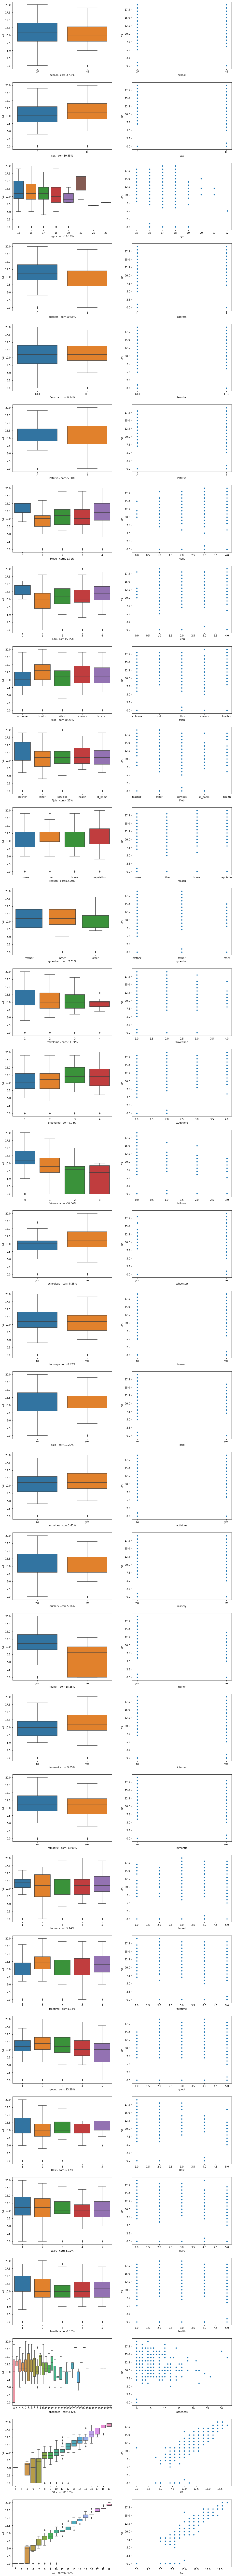

In [274]:
import numpy as np
import seaborn as sns

def corr_anlyze(df, target='G3'):
    cols = list(df.columns)
    cols.remove(target)
    corr_df = pd.DataFrame(columns=cols)
    f, axes = plt.subplots(len(cols), 2, figsize=(16,6*len(cols)))
    for i,col in enumerate(cols):
        sns.boxplot(x=col, y=target, data = df , ax=axes[i][0])
        if df[col].dtypes=='int64':
            corr = df[col].corr(df[target])
        else:
            corr = df[col].astype("category").cat.codes.corr(df[target])
        corr_df.loc['corr',col] = corr
        axes[i][0].set_xlabel(f'{col} - corr:{corr:.2%}')
        sns.scatterplot(x=col, y=target, data = df3 ,  ax=axes[i][1])
    return corr_df
corr_df = corr_anlyze(math_df)


### List Correlation value for each feature 

In [191]:
corr_df = corr_df.transpose()
corr_df['abs_corr'] = corr_df['corr'].abs()
display(corr_df.sort_values('abs_corr',ascending=False))

,corr,abs_corr
G2,0.904868,0.904868
G1,0.801468,0.801468
failures,-0.360415,0.360415
Medu,0.217147,0.217147
higher,0.182465,0.182465
age,-0.161579,0.161579
Fedu,0.152457,0.152457
goout,-0.132791,0.132791
romantic,-0.12997,0.12997
reason,0.121994,0.121994


** Below is some observations base on the Correlation analysis results**
1. G3 has strong correlation with G1 or G2
2. G3 has weak correlation with failures, Medu, higher
3. G3 has no obvious correlation with sex, school or other single feature 

## Algorithms and modules

List algorithms

In [218]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression  
from sklearn.linear_model import LinearRegression  
from sklearn.naive_bayes import GaussianNB  
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

def decisionTree():
    dt = DecisionTreeClassifier()
    return dt
def knn():
    knn = KNeighborsRegressor(n_neighbors=1)
    return knn

def extraTreesRegressor():
    clf = ExtraTreesRegressor(n_estimators=100,max_features='auto', verbose=0, n_jobs=1)
    return clf

def randomForestRegressor():
    clf = RandomForestRegressor(n_estimators=100,max_features='log2', verbose=0)
    return clf

def LR():
    clf = LogisticRegression(solver='lbfgs', max_iter=10000)
    return clf

def NB():
    clf = GaussianNB()
    return clf

class MyAVERAGE:
    def fit(self,train_X,train_Y):
        self.mean_score = train_Y.mean()
        return self
    def predict(self, test_x):
        test_x['predict'] = self.mean_score
        return test_x['predict']

class LRPolynomialFeatures:
    def __init__(self, degree):
        self.poly = PolynomialFeatures(degree = degree)
        self.lr = LinearRegression()
    def fit(self,train_X,train_Y):
        x_poly = self.poly.fit_transform(train_X)
        self.lr.fit(x_poly, train_Y)
        self.coef_ = self.lr.coef_
        return self
    def predict(self, train_X):
        x_poly = self.poly.fit_transform(train_X)
        return self.lr.predict(x_poly)
    

def allmodels():
    return {
        #'LR PolynomialFeatures' : LRPolynomialFeatures(3),
        #'Logistic Regression': LR(),
        'Linear Regression': LinearRegression(),
        #'Naive Bayes': GaussianNB(),
        #'KNN':knn(),
        #'Decision Tree': decisionTree(),
        'Random Forest': randomForestRegressor(),
        #'Extra Tree': extraTreesRegressor(),
        #'AVG grade': MyAVERAGE(),
    }

### Set up KFold Cross Validation
Use mean absolute error for result score 

In [219]:
def norm(df):
    for col in df.columns:
        mean1 = np.mean(df[col])
        std1 = np.std(df[col])
        df[col] = (df[col].values - mean1)/std1
    return df

def important_features(model, X_df):
    importances = 'No importances features'
    if hasattr(model, 'coef_'):
        if len(model.coef_)==len(X_df.columns):
            importances = pd.DataFrame({"Feature":X_df.columns.tolist(),"Coefficients":np.abs([x for x in model.coef_])})
        else:
            importances = pd.DataFrame({"Feature":X_df.columns.tolist(),"Coefficients":np.abs(model.coef_[0])})
        importances = importances.sort_values('Coefficients',ascending=False).reset_index(drop=True)
    if hasattr(model, 'feature_importances_'):
        importances =  pd.DataFrame({"Feature":X_df.columns.tolist(),"Coefficients":model.feature_importances_})
        importances= importances.sort_values('Coefficients',ascending=False).reset_index(drop=True)
    return importances

def CrossValidation(df, models=allmodels(), doNorm = False, predictCol = 'G3', showImportance = False):
    Y_df = df[predictCol]
    X_df = df.drop([predictCol], axis = 1) 
    if doNorm==True:
        X_df = norm(X_df)
    kf = KFold(n_splits=5)
    model_result = pd.DataFrame(columns =  ['Algorithm','fold 1','fold 2','fold 3','fold 4','fold 5','fold mean'])
    for key,v in models.items():
        result = [key]
        estimator = v
        for train_index, test_index in kf.split(df):
            estimator.fit(X_df.loc[train_index],Y_df.loc[train_index])
            predict_Y = estimator.predict(X_df.loc[test_index])
            #score = estimator.score(X_df.loc[test_index], Y_df.loc[test_index])
            score = mean_absolute_error(Y_df.loc[test_index],predict_Y)
            result.append(score)
        if showImportance == True:
            importances = important_features(estimator, X_df)
            display(f'{key} , fold {len(result)}:')
            display(importances[0:10].transpose())
        result.append(np.mean(result[1:6]))
        model_result.loc[len(model_result), :] = result
    model_result= model_result.sort_values('fold mean',ascending=True ).reset_index(drop=True)
    #display( model_result)
    return model_result


Training with all features. So if we can know G2 score for each student, we can predict the G3 results with high accuracy

In [278]:
df = math_df.copy()
df = pd.get_dummies(df)
#display(df)
print('All features')
model_result = CrossValidation(df, doNorm = False, showImportance=False)
display(model_result)
print('Only G2')
model_result = CrossValidation(df.loc[:,['G2','G3']], doNorm = False, showImportance=False)
display(model_result)


All features


,Algorithm,fold 1,fold 2,fold 3,fold 4,fold 5,fold mean
0,Linear Regression,1.20875,1.27745,1.54084,1.25385,1.538,1.36378
1,Random Forest,1.56886,2.56797,1.67557,2.02722,2.24772,2.01747


Only G2


,Algorithm,fold 1,fold 2,fold 3,fold 4,fold 5,fold mean
0,Linear Regression,0.826689,1.17269,1.19465,1.16307,1.37494,1.14641
1,Random Forest,0.925415,1.0064,1.26963,1.13339,1.49253,1.16547


### Predict without G1 ang G2
### Predict math 

In [279]:
df = math_df.copy().drop(['G1', 'G2'],axis=1)
df = pd.get_dummies(df)
#display(df)
model_result = CrossValidation(df, doNorm = False, showImportance=True)
display(model_result)

'Linear Regression , fold 6:'

,0,1,2,3,4,5,6,7,8,9
Feature,failures,Fjob_teacher,higher_no,higher_yes,Mjob_teacher,goout,Fjob_other,Mjob_services,Mjob_health,Fjob_services
Coefficients,1.64833,1.1911,1.14827,1.14827,1.03738,0.940476,0.931434,0.927695,0.893182,0.805391


'Random Forest , fold 6:'

,0,1,2,3,4,5,6,7,8,9
Feature,absences,failures,goout,age,freetime,health,Medu,famrel,studytime,Walc
Coefficients,0.073118,0.0664277,0.0473869,0.0379914,0.0374181,0.0343412,0.0336983,0.0327494,0.0312507,0.0309268


,Algorithm,fold 1,fold 2,fold 3,fold 4,fold 5,fold mean
0,Random Forest,2.67696,3.74878,2.91975,3.32696,3.4643,3.22735
1,Linear Regression,2.85662,4.00268,3.12218,3.53928,3.80968,3.46609


### Predict por

In [256]:
df = por_df.copy().drop(['G1', 'G2'],axis=1)
df = pd.get_dummies(df)
#display(df)
model_result = CrossValidation(df, doNorm = False, showImportance=True)
display(model_result)

'Linear Regression , fold 6:'

,0,1,2,3,4,5,6,7,8,9
Feature,address_U,address_R,guardian_other,guardian_mother,guardian_father,nursery_no,nursery_yes,Mjob_health,Mjob_teacher,Mjob_services
Coefficients,3.75339e+12,3.75339e+12,2.25042e+12,2.25042e+12,2.25042e+12,1.82264e+12,1.82264e+12,1.33581e+12,1.33581e+12,1.33581e+12


'Random Forest , fold 6:'

,0,1,2,3,4,5,6,7,8,9
Feature,failures,absences,Walc,goout,Medu,Fedu,health,freetime,famrel,studytime
Coefficients,0.0551669,0.0521282,0.0461778,0.0428297,0.0407489,0.0352797,0.034617,0.0345471,0.0331871,0.0324937


,Algorithm,fold 1,fold 2,fold 3,fold 4,fold 5,fold mean
0,Random Forest,1.47669,1.81108,1.91965,2.03592,2.83186,2.01504
1,Linear Regression,1.59197,1.88271,1.8074,2.08156,2.92893,2.05851


#### Get the top 10 important features from Random Forest algorithm for math and train the model. The result can be improved

In [282]:
cols = ['failures','absences','goout','freetime','Medu','famrel','age','studytime','health','Walc']
cols = ['failures','absences', 'Walc','failures', 'health', 'goout', 'freetime', 'traveltime','higher']
#cols = ['failures','higher','Fjob','Mjob','Medu','famrel','goout','studytime','health','Walc']
cols.append('G3')
df = pd.get_dummies(math_df.loc[:,cols])
#display(df)
model_result = CrossValidation(df, doNorm = False, showImportance=False)
display(model_result)

,Algorithm,fold 1,fold 2,fold 3,fold 4,fold 5,fold mean
0,Random Forest,2.72428,3.68548,2.85001,3.15028,3.50118,3.18225
1,Linear Regression,2.71305,3.92743,3.06183,3.12132,3.7247,3.30966


### Use Greedy Algorithm to select features

In [287]:
def doOneValidation(df_all, k, m, cols_test, cols, best_score):
    #print(f'{k}: doOneValidation cols:{cols_test}, score:{best_score}')
    best_cols = cols_test.copy()
    new_best_score = best_score
    for col in cols:
        if col in cols_test:
            continue
        cols_test_new = cols_test.copy()
        cols_test_new.append(col)
        #print(f'cols_test_new:{cols_test_new}, cols_test:{cols_test}')
        df = df_all.loc[:,cols_test_new]
        df = pd.get_dummies(df)
        ret =  CrossValidation(df, doNorm = False, showImportance=False, models = {k:m})
        newscore = ret.loc[0,'fold mean']
        #print(f'{k}: CrossValidation result cols:{cols_test_new}, score:{newscore}')
        if newscore<best_score:
            best_cols = cols_test_new.copy()
            new_best_score = newscore
    if new_best_score<best_score:
        return doOneValidation(df_all, k, m, best_cols, cols, new_best_score)
    return new_best_score, best_cols

def greedyValidation(df_all, models = allmodels()):
    cols = df_all.drop(['G1','G2','G3'],axis=1).columns.tolist()
    for k,m in models.items():
        best_score = np.iinfo(np.int32).max
        cols_test = ['G3']
        score, best_cols = doOneValidation(df_all, k, m, cols_test, cols, best_score)
        print(f'{k} best score: {score}, important features:{best_cols}')

Apply greedy algorithm with Linear Regression for Math

In [288]:
greedyValidation(math_df, models = {'LR':LinearRegression()})

LR best score: 3.238921244811929, important features:['G3', 'absences', 'Walc', 'higher', 'internet', 'schoolsup', 'failures', 'health', 'goout', 'freetime', 'traveltime', 'Mjob', 'famrel', 'address']


Apply greedy algorithm with Linear Regression for Math

In [289]:
greedyValidation(por_df, models = {'LR':LinearRegression()})

LR best score: 2.0089262580546245, important features:['G3', 'absences', 'health', 'Walc', 'Dalc', 'goout', 'romantic', 'internet', 'higher', 'activities', 'paid', 'failures', 'studytime', 'famrel', 'schoolsup', 'traveltime', 'reason', 'Fjob', 'Mjob', 'Medu', 'age', 'sex', 'school', 'famsize']


Select features from result of greedy algorithm. Only select features related to students behaviour, but not related to his family or status such as sex or age. 

In [290]:
cols = ['absences', 'Walc','failures', 'health', 'goout', 'freetime', 'traveltime']
cols.append('G3')
df = pd.get_dummies(math_df.loc[:,cols])
#display(df)
model_result = CrossValidation(df, doNorm = False, showImportance=False)
display(model_result)

,Algorithm,fold 1,fold 2,fold 3,fold 4,fold 5,fold mean
0,Random Forest,2.81331,3.70077,3.03393,3.12046,3.50254,3.2342
1,Linear Regression,2.70487,3.96052,3.00283,3.12208,3.66673,3.29141


The result for math is good. But for por, two more featues related to student's family may need to be added for good result

In [291]:
cols = ['absences', 'Walc','failures', 'health', 'goout', 'freetime', 'traveltime', 'Mjob', 'famrel']
cols.append('G3')
df = pd.get_dummies(por_df.loc[:,cols])
#display(df)
model_result = CrossValidation(df, doNorm = False, showImportance=False)
display(model_result)

,Algorithm,fold 1,fold 2,fold 3,fold 4,fold 5,fold mean
0,Linear Regression,1.57484,1.87711,2.13561,2.11137,3.00933,2.14165
1,Random Forest,1.72094,1.85389,2.24615,2.20131,3.02156,2.20877


A chart to illustrate the linear regression for those 9 features

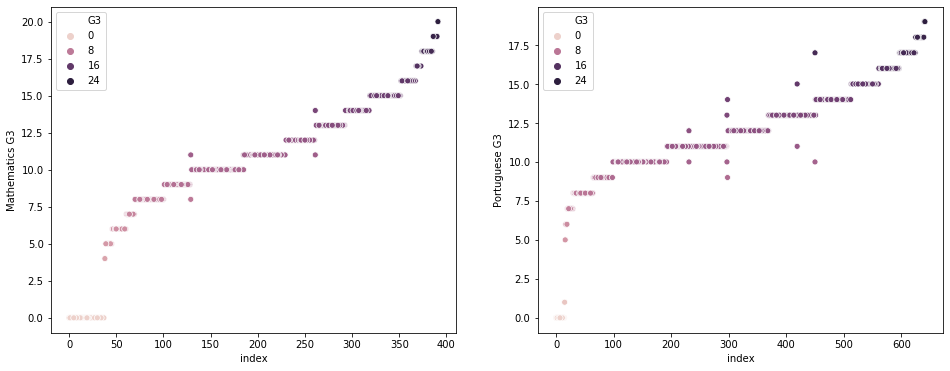

In [293]:
plotcols = ['G3', 'absences', 'Walc','failures', 'health', 'goout', 'freetime', 'traveltime', 'Mjob', 'famrel']

def plot_reg(df,cols,ax):
    target = cols[0]
    df2 = df.loc[:,cols].groupby(cols[1:])[target].mean().sort_values().reset_index().reset_index().drop(target,axis=1)
    df3 = pd.merge(df,df2,on=cols[1:])
    sns.scatterplot(x='index', y=target, data = df3, hue=target, ax=ax)
    #sns.pairplot(df3, x_vars=['index'],y_vars=target,hue=target, ax=ax)


def plot_compare(cols):
    f, axes = plt.subplots(1, 2, figsize=(16,6))
    plot_reg(math_df,cols,axes[0])
    axes[0].set_ylabel('Mathematics G3')
    #axes[0].set_xlabel(f' Features \n{cols}')
    plot_reg(por_df,cols,axes[1])
    axes[1].set_ylabel('Portuguese G3')
    #axes[1].set_xlabel(f'Portuguese Features {cols}')
    
plot_compare(plotcols)